In [1]:
PROJECT_ID = "formazione-riccardo-zanella"
REGION = 'us-central1'
BUCKET_NAME = "bbs-2021-opml4b-explainability"

In [2]:
import tensorflow as tf
import random
import sys

from utils import display_9_images_from_dataset, files_bulk_copy

sys.path.append('../../myproject')
from trainer_image_data.train import load_dataset, get_read_tfrecord

2021-11-10 17:23:19.033560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 17:23:19.033599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
GCS_PATTERN = 'gs://flowers-public/tfrecords-jpeg-192x192-2/*.tfrec'
IMAGE_SIZE = [192, 192]
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.19

# do not change, maps to the labels in the data (folder names)
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
n_classes=len(CLASSES) 

In [4]:
 # Split data files between training and validation
filenames = tf.io.gfile.glob(GCS_PATTERN)
random.shuffle(filenames)

split = int(len(filenames) * VALIDATION_SPLIT)
training_filenames = filenames[split:]
validation_filenames = filenames[:split]
print("Pattern matches {} data files. Splitting dataset into {} training files and {} validation files".format(len(filenames), len(training_filenames), len(validation_filenames)))
validation_steps = int(3670 // len(filenames) * len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(filenames) * len(training_filenames)) // BATCH_SIZE
print("With a batch size of {}, there will be {} batches per training epoch and {} batch(es) per validation run.".format(BATCH_SIZE, steps_per_epoch, validation_steps))

Pattern matches 16 data files. Splitting dataset into 13 training files and 3 validation files
With a batch size of 32, there will be 93 batches per training epoch and 21 batch(es) per validation run.


2021-11-10 17:23:21.663756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-10 17:23:21.663828: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-10 17:23:21.663850: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (INJ-NB-126): /proc/driver/nvidia/version does not exist
2021-11-10 17:23:21.664194: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-10 17:23:21.840032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Opt

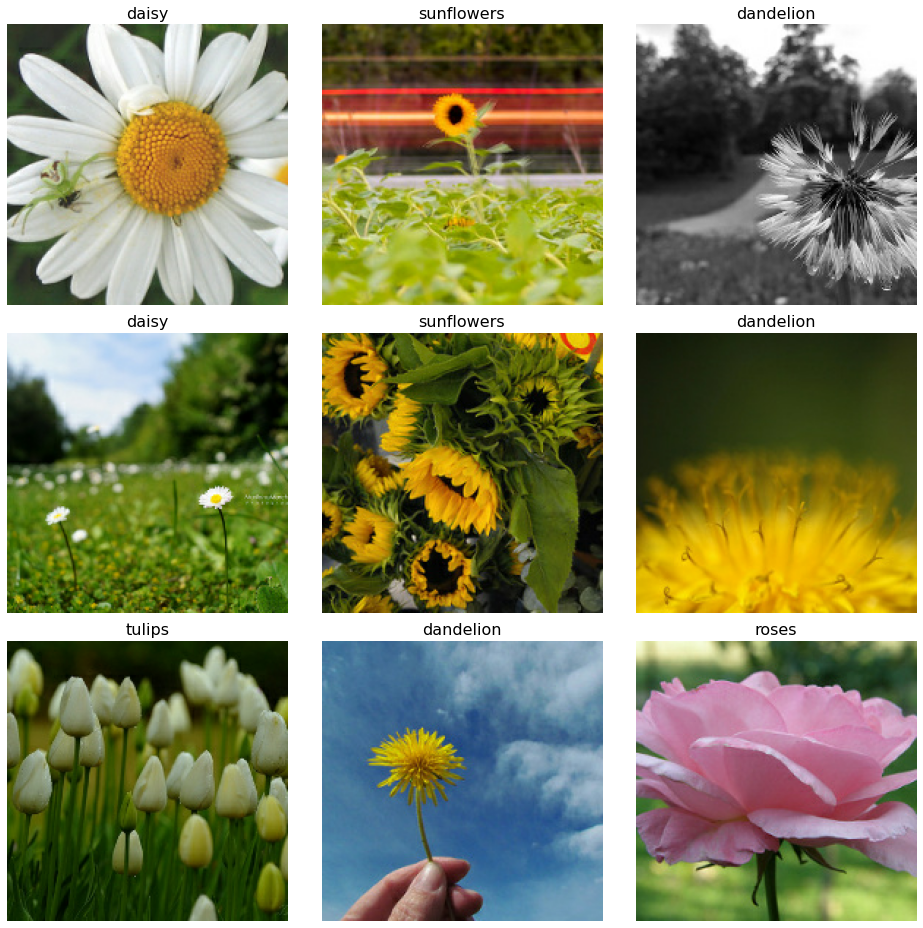

In [5]:
display_9_images_from_dataset(
    load_dataset(training_filenames,  get_read_tfrecord(IMAGE_SIZE, n_classes)),
    classes=CLASSES
)

In [6]:
files_bulk_copy(training_filenames, BUCKET_NAME, 'data/image_data/train')

Blob tfrecords-jpeg-192x192-2/flowers05-230.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flowers05-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers01-230.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flowers01-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers15-220.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flowers15-220.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers03-230.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flowers03-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers08-230.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flowers08-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers06-230.tfrec in bucket flowers-public copied to blob data/image_data_2/train/flower

In [7]:
files_bulk_copy(validation_filenames, BUCKET_NAME, 'data/image_data/test')

Blob tfrecords-jpeg-192x192-2/flowers14-230.tfrec in bucket flowers-public copied to blob data/image_data_2/test/flowers14-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers04-230.tfrec in bucket flowers-public copied to blob data/image_data_2/test/flowers04-230.tfrec in bucket bbs-2021-opml4b-explainability.
Blob tfrecords-jpeg-192x192-2/flowers07-230.tfrec in bucket flowers-public copied to blob data/image_data_2/test/flowers07-230.tfrec in bucket bbs-2021-opml4b-explainability.
